In [6]:
from predict import predict_on_test
from src.data_generator_seq2seq import DataGenerator


In [7]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.misc import toimage
import os
import yaml
from nltk.metrics.distance import edit_distance

In [8]:
#predicts on the testing set
print('Predicting on test set')
CER, WER, labels_test, pred_test, images_test, dat = predict_on_test('src/config.yml')


Predicting on test set
['\t', '\n', '\x0b', '\x0c', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
100
Instructions for updating:
Colocations handled automatically by placer.
be be
the the
( (
Doc's Doi's
a a
a a
London London
panel panel
and and
Alan Alman
reference refreence
Betti's Betts's
thing thing
everywhere everywhere
the the
to to
, ,
some some
help held
in in
complained comparied
None Nane
floor floor
mourning moverning
mouse monse
revered nerved
. .
he he
You Your
that that
has has
the the
talks tables
agree agree
more more
positive sitvit
at at
a 

In [14]:
#loads the configure file so we can call certain specifics in our next cells
with open('src/config.yml') as f:
    config = yaml.load(f)

In [15]:
#need to user data generator to generate data
test_generator = DataGenerator(config, dat, shuffle=False, use_data_augmentation=False)

['\t', '\n', '\x0b', '\x0c', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
100


In [16]:
#pick and index to view the image, actual label and predicted label in the next cell (0 - 11531)
index = 8797
idx_lst = [8797,5546,8316, 8552, 9401,10179,11290,11512,2116,4506,2179,3956,2115,6942,4506,6014,7094,8925,9795,10294,10050,10871,11443,3956,11198,1020,11242, 11220,11218]

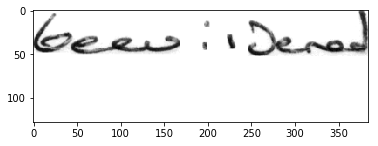

           Actual label:  bewildered
           Predicted Label:  bee-sheisters


In [352]:
index = 11218
plt.imshow(np.reshape(images_test[index, :, :,:], (test_generator.y_size, test_generator.x_size)), cmap=plt.get_cmap('gray'))
plt.show()
print("           Actual label: ", labels_test[index])
print("           Predicted Label: ", pred_test[index])

In [19]:
#examining distance metrics in more depth
words_identified = 0
characters_identified = 0
char_tot = 0
dist = []
n_dist= []

for i in range(len(pred_test)):
    if labels_test[i] == pred_test[i]:
        words_identified += 1

    levenshtein_distance = edit_distance(labels_test[i], pred_test[i])
    dist.append(levenshtein_distance)
    n_char = np.maximum(len(labels_test[i]), len(pred_test[i]))

    normalized_distance = levenshtein_distance/n_char
    n_dist.append(normalized_distance)
    characters_identified += normalized_distance


(array([8.485e+03, 1.259e+03, 7.360e+02, 0.000e+00, 4.360e+02, 2.750e+02,
        1.450e+02, 0.000e+00, 8.500e+01, 5.200e+01, 2.700e+01, 0.000e+00,
        1.700e+01, 6.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
         6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
        13.5 , 14.25, 15.  ]),
 <a list of 20 Patch objects>)

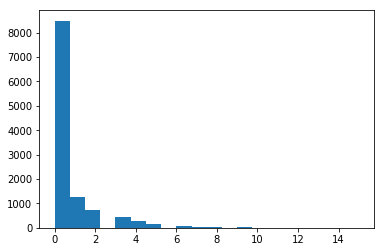

In [20]:
# histogram of unnormalized edit distance metric
plt.hist(dist, bins = 20)

(array([8.485e+03, 2.100e+01, 2.850e+02, 1.590e+02, 2.160e+02, 3.970e+02,
        2.820e+02, 7.900e+01, 2.360e+02, 2.100e+01, 3.440e+02, 1.450e+02,
        4.600e+01, 1.510e+02, 1.800e+01, 8.300e+01, 4.900e+01, 2.900e+01,
        4.000e+00, 4.820e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

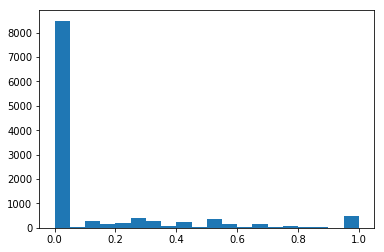

In [21]:
#histogram of the normalized distances
plt.hist(n_dist, bins=20)

In [130]:
#prints the number of words in the testing set that had no errors
count = 0
for i in dist:
    if i ==0:
        count += 1
print(count)

8485


In [132]:
1-(8485/11532) #double checking the word error rate with the counts

0.2642212972597988

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame(dist)

In [24]:
df[0].value_counts()

0     8485
1     1259
2      736
3      436
4      275
5      145
6       85
7       52
8       27
9       17
10       6
11       4
13       2
12       2
15       1
Name: 0, dtype: int64

In [62]:
#create counts as a dataframe
df_sub = df[0].value_counts().reset_index() 

In [63]:
df_sub

,index,0
0,0,8485
1,1,1259
2,2,736
3,3,436
4,4,275
5,5,145
6,6,85
7,7,52
8,8,27
9,9,17


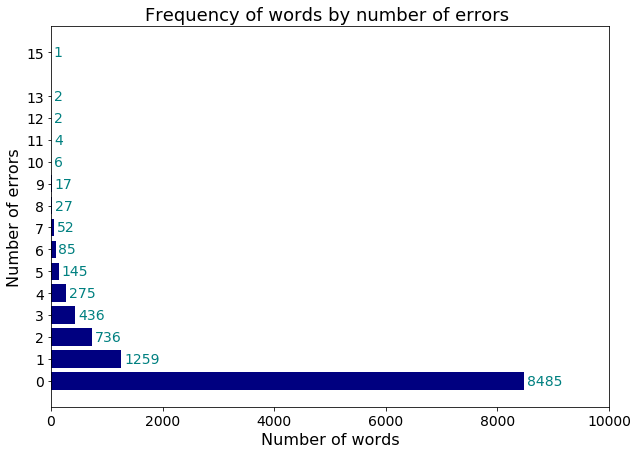

In [74]:
plt.figure(figsize=(10,7))
plt.barh(df_sub['index'], df_sub[0], color = 'navy')
width = 0.75 # the width of the bars 
ind = df_sub['index']
plt.xlabel('Number of words', fontsize = 16)
plt.ylabel('Number of errors', fontsize = 16)
plt.yticks(ind, fontsize = 14)
plt.xticks(fontsize = 14)
# plt.set_yticklabels(x, minor=False)
for i, v in zip(ind, df_sub[0]):
    plt.text(v+50, i, str(v), color='teal', va='center', fontsize = 14)
plt.xlim(0, 10000)
plt.title("Frequency of words by number of errors ", fontsize = 18)
plt.savefig("wordsbyerror.png")

In [ ]:
# number of characters to iterate over
lst = ['\t', '\n', '\x0b', '\x0c', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

In [86]:
d_true = dict((key, 0) for key in lst)

In [87]:
d_error = dict((key, 0) for key in lst)

In [88]:
for true, pred in zip(labels_test, pred_test):
    for i, j in zip(true, pred):
        if i == j:
            d_true[i] += 1
        else:
            d_error[i] += 1
    

In [89]:
d_true

{'\t': 0,
 '\n': 0,
 '\x0b': 0,
 '\x0c': 0,
 '\r': 0,
 ' ': 2,
 '!': 23,
 '"': 138,
 '#': 4,
 '$': 0,
 '%': 0,
 '&': 3,
 "'": 90,
 '(': 20,
 ')': 14,
 '*': 0,
 '+': 0,
 ',': 465,
 '-': 82,
 '.': 545,
 '/': 0,
 '0': 20,
 '1': 41,
 '2': 8,
 '3': 12,
 '4': 3,
 '5': 8,
 '6': 5,
 '7': 2,
 '8': 8,
 '9': 16,
 ':': 6,
 ';': 12,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 17,
 '@': 0,
 'A': 97,
 'B': 65,
 'C': 34,
 'D': 28,
 'E': 48,
 'F': 37,
 'G': 42,
 'H': 69,
 'I': 128,
 'J': 9,
 'K': 7,
 'L': 28,
 'M': 88,
 'N': 52,
 'O': 24,
 'P': 58,
 'Q': 0,
 'R': 26,
 'S': 53,
 'T': 122,
 'U': 4,
 'V': 6,
 'W': 44,
 'X': 0,
 'Y': 9,
 'Z': 0,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 'a': 2909,
 'b': 531,
 'c': 924,
 'd': 1507,
 'e': 4711,
 'f': 894,
 'g': 687,
 'h': 2320,
 'i': 2463,
 'j': 24,
 'k': 176,
 'l': 1418,
 'm': 862,
 'n': 2370,
 'o': 2859,
 'p': 721,
 'q': 20,
 'r': 2098,
 's': 2386,
 't': 3448,
 'u': 910,
 'v': 318,
 'w': 763,
 'x': 72,
 'y': 644,
 'z': 6,
 '{': 0,
 '|': 0,
 '}': 0,
 '~'

In [90]:
d_error

{'\t': 0,
 '\n': 0,
 '\x0b': 0,
 '\x0c': 0,
 '\r': 0,
 ' ': 1,
 '!': 2,
 '"': 49,
 '#': 2,
 '$': 0,
 '%': 0,
 '&': 0,
 "'": 86,
 '(': 4,
 ')': 13,
 '*': 0,
 '+': 1,
 ',': 97,
 '-': 58,
 '.': 50,
 '/': 2,
 '0': 15,
 '1': 24,
 '2': 15,
 '3': 12,
 '4': 7,
 '5': 8,
 '6': 10,
 '7': 1,
 '8': 2,
 '9': 5,
 ':': 1,
 ';': 2,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 2,
 '@': 0,
 'A': 35,
 'B': 20,
 'C': 27,
 'D': 20,
 'E': 32,
 'F': 13,
 'G': 24,
 'H': 18,
 'I': 51,
 'J': 11,
 'K': 9,
 'L': 30,
 'M': 22,
 'N': 24,
 'O': 28,
 'P': 11,
 'Q': 1,
 'R': 24,
 'S': 54,
 'T': 29,
 'U': 9,
 'V': 7,
 'W': 24,
 'X': 0,
 'Y': 11,
 'Z': 4,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 'a': 637,
 'b': 120,
 'c': 258,
 'd': 179,
 'e': 657,
 'f': 121,
 'g': 130,
 'h': 224,
 'i': 541,
 'j': 9,
 'k': 95,
 'l': 300,
 'm': 223,
 'n': 555,
 'o': 454,
 'p': 104,
 'q': 11,
 'r': 525,
 's': 354,
 't': 413,
 'u': 283,
 'v': 107,
 'w': 122,
 'x': 29,
 'y': 90,
 'z': 13,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0}

In [200]:
df_error = pd.DataFrame(list(d_error.items()), columns = ['char', 'num'])


In [201]:
df_true = pd.DataFrame(list(d_true.items()), columns = ['char', 'num'])

In [202]:
ids = []
for idx, (true, error) in enumerate(zip(df_true['num'], df_error['num'])):
    if true == 0 and error == 0:
        ids.append(idx)

In [203]:
df_error = df_error.drop(ids, axis = 0).reset_index(drop=True)
df_true = df_true.drop(ids, axis = 0).reset_index(drop=True)

In [204]:
df_new = df_true.copy()

In [263]:
df_new['errornum'] = df_error['num']
df_new['fraction'] = df_new['errornum']/(df_new['errornum'] + df_new['num'])
df_new['total'] = (df_new['errornum'] + df_new['num'])
df_new['fract'] = 100

In [264]:
df_new.sort_values('fraction', inplace = True, ascending = False)

In [265]:
lst = df_new['char']

In [266]:
totals = [i+j for i, j in zip(df_new['num'], df_new['errornum'])]
errorBars = [i / j * 100 for i, j in zip(df_new['errornum'], totals)]
trueBars = [i / j * 100 for i, j in zip(df_new['num'], totals)]

''

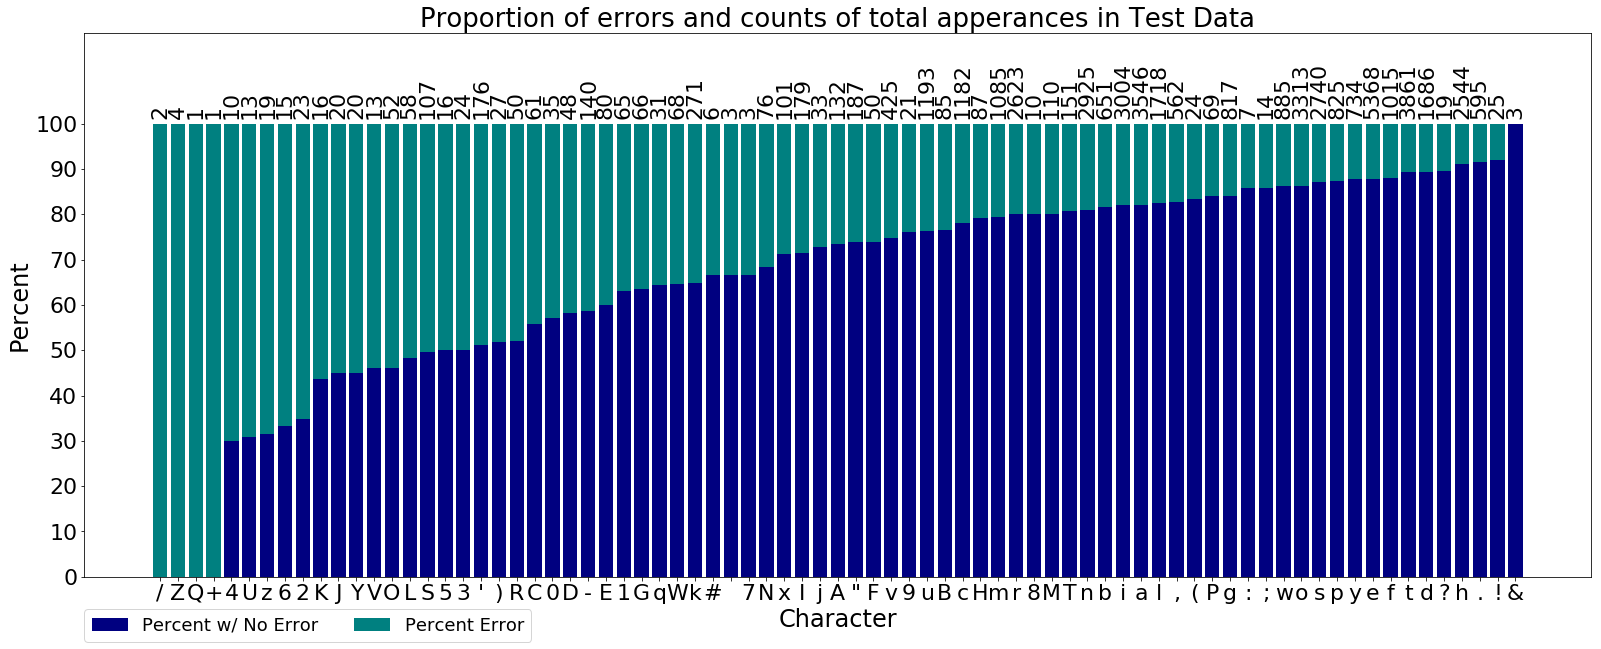

In [302]:
N = 77
ind = np.arange(N)
w = 0.8
plt.figure(figsize=(27,10))
plt.bar(ind, trueBars, width = w, color = 'navy', label = 'Percent w/ No Error')
plt.bar(ind, errorBars, width = w, color = 'teal', bottom = trueBars, label = "Percent Error")
plt.ylabel('Percent', fontsize = 24)
plt.xlabel('Character', fontsize = 24)
plt.xticks(ind, lst, fontsize=22)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 22)
plt.legend(bbox_to_anchor=(0, -0.06, 1, 0), loc=2, ncol=2, borderaxespad=0,fontsize = 18)
for h, (i, v) in zip(df_new['fract'], zip(ind, df_new['total'])):
    plt.text(i, h + 1, str(v), color='black', fontsize = 22, rotation = 90, va='bottom', ha = 'center')
plt.ylim(0, 120)
plt.title('Proportion of errors and counts of total apperances in Test Data', fontsize = 26)
plt.savefig('error_rates.png')
;

In [308]:
import json
with open(config['labels_file']) as f:
    dataset = json.load(f)
print(dataset.keys())

dict_keys(['train', 'val', 'test'])


In [362]:
targets = []
train = []
test = []
val = []
for i in dataset['test']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    test.append([i['label'], i['filename'], len(i['label'])])
for i in dataset['train']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    train.append([i['label'], i['filename'], len(i['label'])])
for i in dataset['val']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    val.append([i['label'], i['filename'], len(i['label'])])



In [363]:
df_targ = pd.DataFrame(targets, columns = ['labels','file', 'len'])

In [364]:
df_targ.sort_values('len', ascending=True, inplace = True)

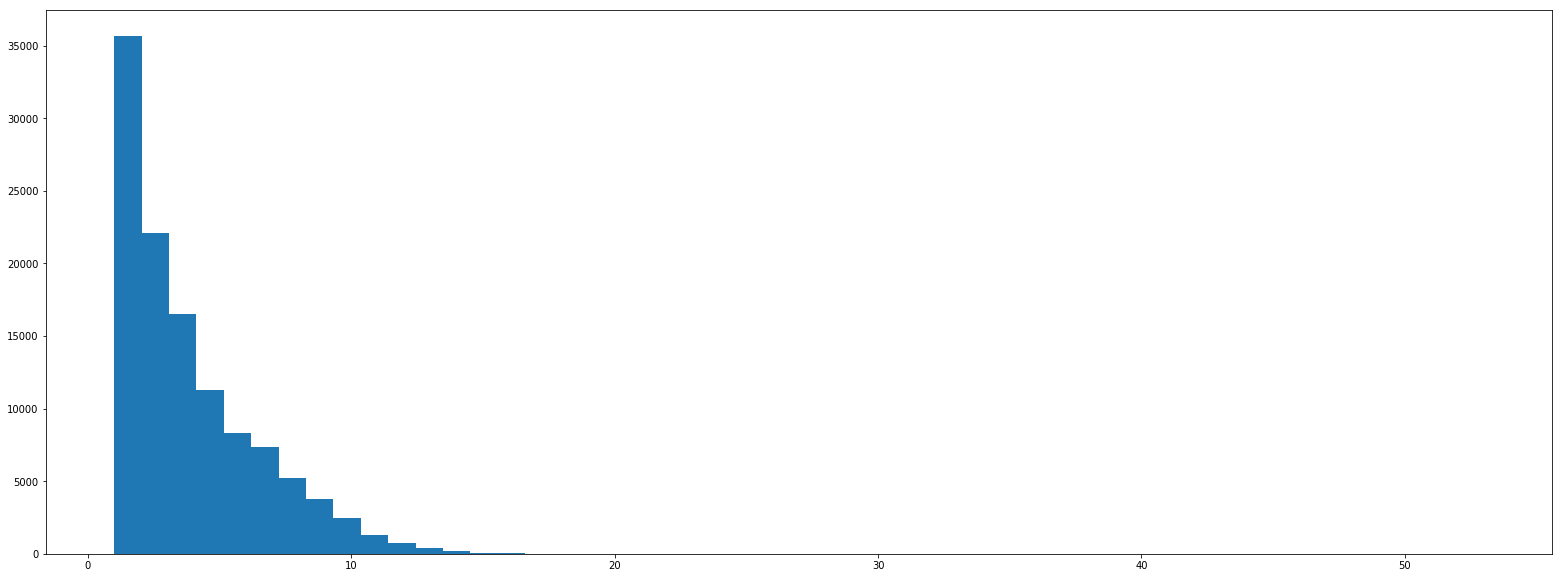

In [365]:
plt.figure(figsize=(27,10))
plt.hist(df_targ['len'], bins = 50);

In [366]:
df_test =  pd.DataFrame(test, columns = ['labels','file', 'len'])
df_train =  pd.DataFrame(train, columns = ['labels','file', 'len'])
df_val =  pd.DataFrame(val, columns = ['labels','file', 'len'])


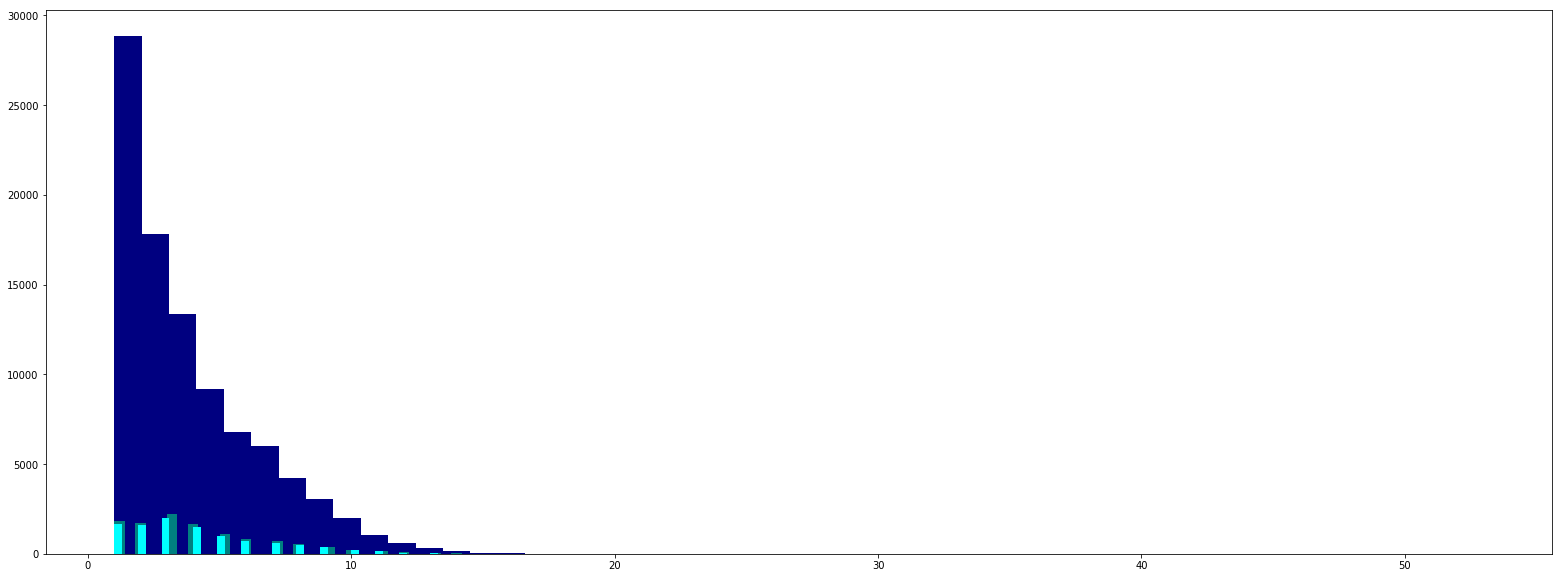

In [368]:
plt.figure(figsize=(27,10))
plt.hist(df_train['len'], color = 'navy', label = 'Training Dataset', bins = 50)
plt.hist(df_test['len'], color = 'teal', label = 'Testing Dataset', bins = 50)
plt.hist(df_val['len'], color = 'aqua', label = 'Validation Dataset', bins = 50);
